In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Data**

In [2]:
df=pd.read_csv('/Users/hailing/Downloads/Assignment_2_-_Regression/raw_sales.csv')

In [3]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [4]:
#Check for the shape
df.shape

(29580, 5)

In [5]:
# Check for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [6]:
df.columns.values

array(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'],
      dtype=object)

In [7]:
df.count()

datesold        29580
postcode        29580
price           29580
propertyType    29580
bedrooms        29580
dtype: int64

In [8]:
#checking the numerical columns
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [9]:
#check for null values
df.isnull().sum().sort_values(ascending=False)

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [10]:
# Converting 'datesold' from object into datetime format
df['datesold'] = pd.to_datetime(df['datesold'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')

#Split the date into year, month, date
df['Year'] = df['datesold'].apply(lambda x: str(x)[:4])
df['Month'] = df['datesold'].apply(lambda x: str(x)[5:7])
df['Day'] = df['datesold'].apply(lambda x: str(x)[8:10])


In [11]:
# Check the count of samples in each year
df.groupby('Year').size()

Year
2007     147
2008     639
2009    1426
2010    1555
2011    1633
2012    1858
2013    2119
2014    2863
2015    3648
2016    3908
2017    4541
2018    3858
2019    1385
dtype: int64

In [12]:
# Check the count of samples in each month
df.groupby('Month').size()


Month
01    1304
02    2656
03    2878
04    2468
05    2797
06    2213
07    2386
08    2429
09    2367
10    2548
11    3102
12    2432
dtype: int64

In [13]:
# Check the count of samples in each date
df.groupby('Day').size()

Day
01     909
02     899
03     926
04     963
05    1031
06     904
07     996
08     905
09     925
10     987
11     895
12     932
13     945
14     922
15    1023
16    1013
17    1105
18    1051
19    1086
20    1042
21    1047
22    1074
23    1037
24    1047
25     890
26     830
27     922
28    1004
29     856
30     853
31     561
dtype: int64

In [14]:
# Drop the original 'datesold' column
df.drop('datesold', axis=1, inplace=True)

# Display the extracted date components
print(df[['Year', 'Month', 'Day']].head())


   Year Month Day
0  2007    02  07
1  2007    02  27
2  2007    03  07
3  2007    03  09
4  2007    03  21


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      29580 non-null  int64 
 1   price         29580 non-null  int64 
 2   propertyType  29580 non-null  object
 3   bedrooms      29580 non-null  int64 
 4   Year          29580 non-null  object
 5   Month         29580 non-null  object
 6   Day           29580 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [16]:
df.groupby('propertyType').size()

propertyType
house    24552
unit      5028
dtype: int64

In [17]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'propertyType' column
df['propertyType'] = label_encoder.fit_transform(df['propertyType'])

# Check the count of samples in propertyType
df.groupby('propertyType').size()

propertyType
0    24552
1     5028
dtype: int64

In [18]:
#set price as the target variable for y

#drop price from X
X = df.iloc[:,df.columns != 'price'].values
y = df.iloc[:,1].values
df.head()

,postcode,price,propertyType,bedrooms,Year,Month,Day
0,2607,525000,0,4,2007,02,07
1,2906,290000,0,3,2007,02,27
2,2905,328000,0,3,2007,03,07
3,2905,380000,0,4,2007,03,09
4,2906,310000,0,3,2007,03,21


In [19]:
X

array([[2607, 0, 4, '2007', '02', '07'],
       [2906, 0, 3, '2007', '02', '27'],
       [2905, 0, 3, '2007', '03', '07'],
       ...,
       [2912, 1, 2, '2019', '07', '26'],
       [2601, 1, 2, '2019', '07', '26'],
       [2612, 1, 2, '2019', '07', '26']], dtype=object)

In [20]:
y

array([525000, 290000, 328000, ..., 464950, 589000, 775000])

/var/folders/s2/r5xn6dmj38v0rrs7t53585bc0000gn/T/ipykernel_65990/2721992687.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

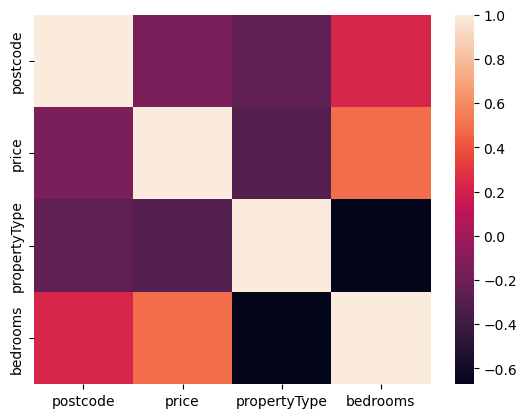

In [21]:
#Data Visualisation to see the correlation between different columns
sns.heatmap(df.corr())


In [22]:
df.head()

,postcode,price,propertyType,bedrooms,Year,Month,Day
0,2607,525000,0,4,2007,02,07
1,2906,290000,0,3,2007,02,27
2,2905,328000,0,3,2007,03,07
3,2905,380000,0,4,2007,03,09
4,2906,310000,0,3,2007,03,21


In [23]:
X

array([[2607, 0, 4, '2007', '02', '07'],
       [2906, 0, 3, '2007', '02', '27'],
       [2905, 0, 3, '2007', '03', '07'],
       ...,
       [2912, 1, 2, '2019', '07', '26'],
       [2601, 1, 2, '2019', '07', '26'],
       [2612, 1, 2, '2019', '07', '26']], dtype=object)

**Running the regression model**

In [24]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Model Building

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predicting the test results
y_pred = model.predict(X_test)
y_pred

array([638132.80135116, 875878.80987845, 611669.27292759, ...,
       508314.04401529, 553421.46174401, 414295.32740377])

In [28]:
y_test

array([561000, 851000, 545000, ..., 235500, 560000, 453500])

In [29]:
model.coef_

array([-78059.97187797,  -8980.4183142 , 153038.5388731 ,  58213.35969597,
         9807.97859618,   2267.37668412])

In [30]:
model.intercept_

611076.9716024352

In [31]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3752435378843749

**Plotting the test vs predicted data**

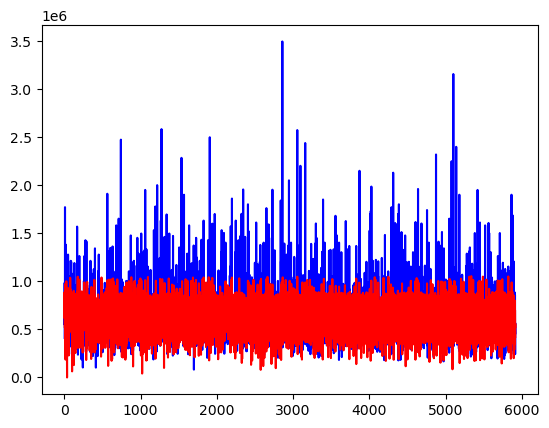

In [32]:
# Plot the test vs prediction data

plt.plot(y_test, color='blue', label='test')
plt.plot(y_pred, color='red', label='predictions')
plt.show()

Feature: 0, Score: -78059.97188
Feature: 1, Score: -8980.41831
Feature: 2, Score: 153038.53887
Feature: 3, Score: 58213.35970
Feature: 4, Score: 9807.97860
Feature: 5, Score: 2267.37668


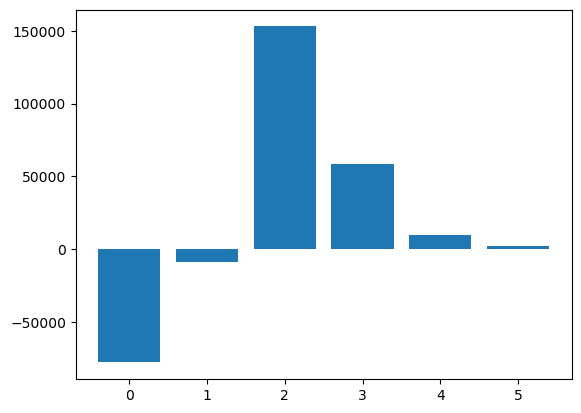

In [33]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Conclusion:**

1. It shows that feature 0(postcode) has the most negative importance on house prices, while feature 2 (bedrooms) has the highest positive importance on house prices.
2. The target variable (propertyType) on the other hand has very little importance on house prices.

In [34]:
df.head()

,postcode,price,propertyType,bedrooms,Year,Month,Day
0,2607,525000,0,4,2007,02,07
1,2906,290000,0,3,2007,02,27
2,2905,328000,0,3,2007,03,07
3,2905,380000,0,4,2007,03,09
4,2906,310000,0,3,2007,03,21


**Calculatting RMSE score**

In [35]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

204381.11481759782

**Note:** 

As per discussion with my tutor, Giorgi, we have concluded that there is literally no way to upload this file to Kaggle for review as the train & test dataset provided on Kaggle is different from the one I'm using for this assignment. Ours has 29,850 rows, while the datset in Kaggle has 1460 and 1461 rows respectively for both train and test datset. 

Hence, it is impossible for us to match the ID & values that Kaggle want us to predict(we can only submit the file in ID and Saleprice format into Kaggle, other formats are not accepted including my current file). Therefore I'm creating this RMSE score here to show that the RMSE score of my model is indeed >15,400 as required by the overview doc.